# AIDS Virus Infection Prediction 

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d aadarshvelu/aids-virus-infection-prediction

Dataset URL: https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction
License(s): CC0-1.0
100%|███████████████████████████████████████| 1.63M/1.63M [00:10<00:00, 149kB/s]
100%|███████████████████████████████████████| 1.63M/1.63M [00:10<00:00, 159kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/AIDS Virus Infection Prediction /aids-virus-infection-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/AIDS Virus Infection Prediction ')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AIDS_Classification_50000.csv')

In [3]:
df.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0


In [4]:
df.shape

(50000, 23)

In [5]:
df.size

1150000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


In [8]:
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

time         1094
trt             4
age            57
wtkg        49623
hemo            2
homo            2
drugs           2
karnof         13
oprior          2
z30             2
preanti      1775
race            2
gender          2
str2            2
strat           3
symptom         2
treat           2
offtrt          2
cd40          639
cd420         902
cd80         2710
cd820        2020
infected        2
dtype: int64

In [11]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())

time
time
1134    280
1144    249
1148    249
1133    242
1151    240
       ... 
121       1
112       1
176       1
169       1
137       1
Name: count, Length: 1094, dtype: int64
trt
trt
0    18592
3    13513
2    10806
1     7089
Name: count, dtype: int64
age
age
36    3019
35    2880
37    2819
34    2693
38    2654
39    2430
33    2398
28    2313
29    2257
32    2251
31    2196
27    2168
40    2086
30    2067
26    1912
41    1821
42    1433
25    1423
43    1255
24    1049
44     889
45     738
23     694
46     542
22     493
47     412
21     404
48     308
20     296
49     247
19     237
50     231
18     207
51     147
17     142
52     133
53     109
54     100
16      98
55      64
57      64
15      55
56      52
59      37
14      36
58      35
60      26
13      20
12      15
62      15
61      14
63       8
66       2
64       2
68       2
65       1
67       1
Name: count, dtype: int64
wtkg
wtkg
71.79527    3
74.17556    3
80.07055    3
69.81369    2
78.56176    2

## Data Preprocessing

In [12]:
# Removing Outlier using IQR method

def replace_outliers_with_bounds(df):
    
    numeric_columns = df.drop("infected", axis = 1)
    
    for col in numeric_columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR) 
        upper_bound = float(q3 + 1.5 * IQR)  

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

df = replace_outliers_with_bounds(df)

In [13]:
X = df.drop('infected', axis = 1)
y = df['infected']

In [14]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Model Building

In [16]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [17]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [18]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7043, 0.7047, 0.6937, 0.7027, 0.705, 0.7062, 0.6922, 0.6095, 0.7062]


## Model Evaluation

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      6923
           1       0.55      0.23      0.33      3077

    accuracy                           0.70     10000
   macro avg       0.64      0.57      0.57     10000
weighted avg       0.67      0.70      0.66     10000

Confusion Matrix:
 [[6328  595]
 [2362  715]]


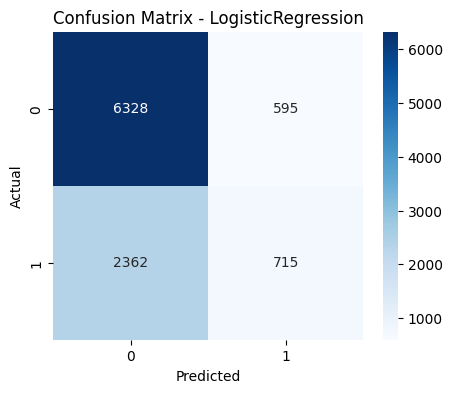

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81      6923
           1       0.56      0.18      0.28      3077

    accuracy                           0.70     10000
   macro avg       0.64      0.56      0.55     10000
weighted avg       0.67      0.70      0.65     10000

Confusion Matrix:
 [[6478  445]
 [2508  569]]


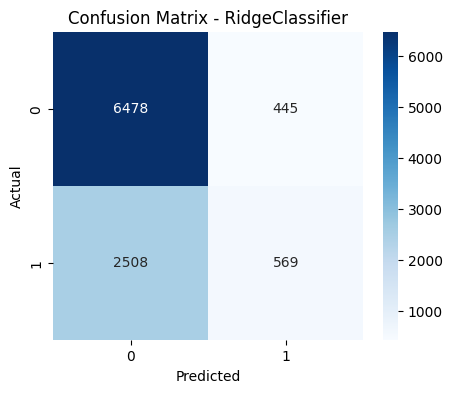

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80      6923
           1       0.50      0.28      0.36      3077

    accuracy                           0.69     10000
   macro avg       0.62      0.58      0.58     10000
weighted avg       0.66      0.69      0.66     10000

Confusion Matrix:
 [[6072  851]
 [2212  865]]


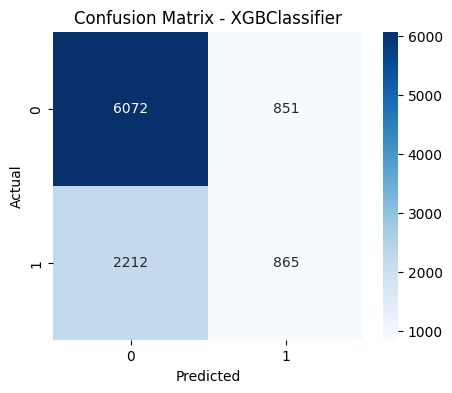

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      6923
           1       0.55      0.25      0.34      3077

    accuracy                           0.71     10000
   macro avg       0.64      0.58      0.58     10000
weighted avg       0.68      0.71      0.67     10000

Confusion Matrix:
 [[6301  622]
 [2318  759]]


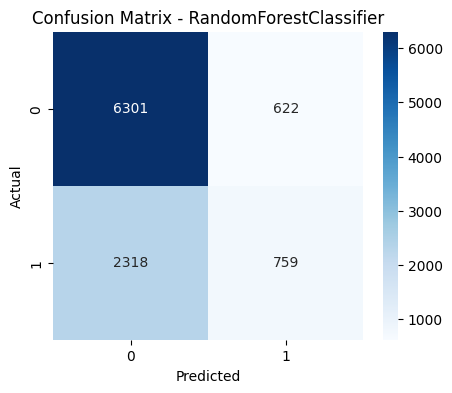

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      6923
           1       0.55      0.24      0.33      3077

    accuracy                           0.70     10000
   macro avg       0.64      0.58      0.57     10000
weighted avg       0.67      0.70      0.66     10000

Confusion Matrix:
 [[6308  615]
 [2335  742]]


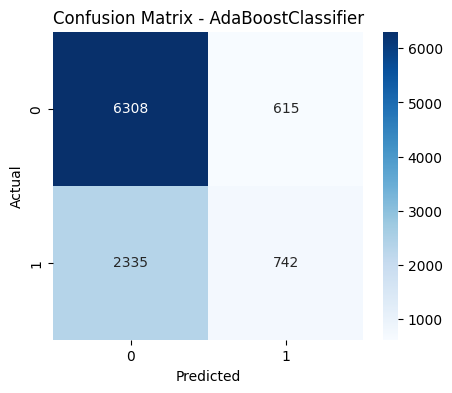

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.92      0.81      6923
           1       0.55      0.23      0.32      3077

    accuracy                           0.71     10000
   macro avg       0.64      0.57      0.57     10000
weighted avg       0.67      0.71      0.66     10000

Confusion Matrix:
 [[6356  567]
 [2371  706]]


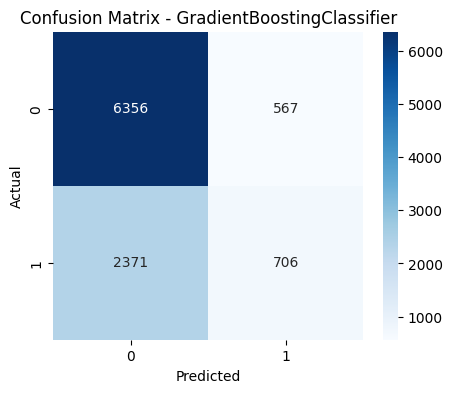

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79      6923
           1       0.46      0.24      0.31      3077

    accuracy                           0.68     10000
   macro avg       0.59      0.56      0.55     10000
weighted avg       0.64      0.68      0.64     10000

Confusion Matrix:
 [[6057  866]
 [2341  736]]


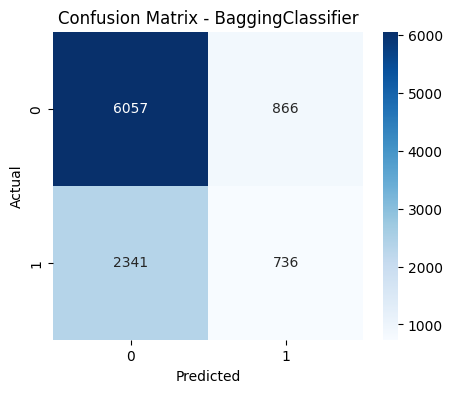

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.70      0.71      6923
           1       0.37      0.40      0.38      3077

    accuracy                           0.61     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.61      0.61      0.61     10000

Confusion Matrix:
 [[4855 2068]
 [1858 1219]]


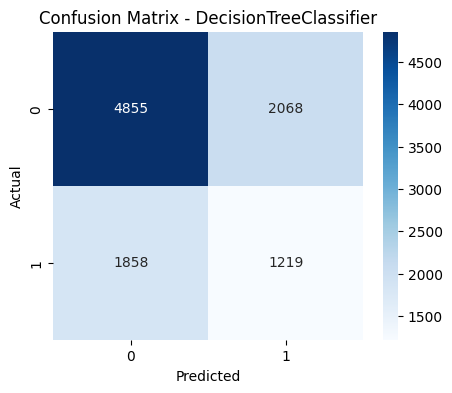

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82      6923
           1       0.58      0.17      0.26      3077

    accuracy                           0.71     10000
   macro avg       0.65      0.56      0.54     10000
weighted avg       0.68      0.71      0.65     10000

Confusion Matrix:
 [[6543  380]
 [2558  519]]


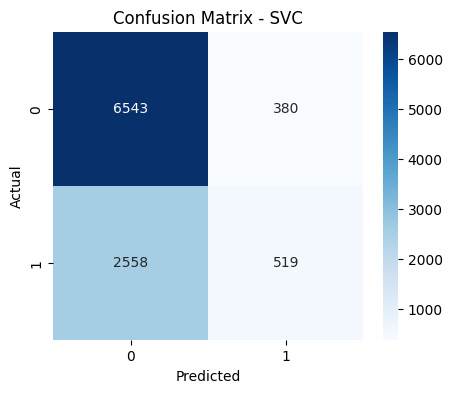

In [20]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()